Nate, Erik, and Jake

Group BadJ

HW 9

In [4]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import statsmodels.api as sm

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

rand_state = 1000

In [5]:
#Pulling in the data
df = pd.read_csv ('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/fall22/data/HW_data/HW9/bikeshare.csv')
df.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday,cnt
0,1,0,1,0,0,6,1,1,-1.334609,0.947345,-1.553844,2011-01-01,16
1,1,0,1,1,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,40
2,1,0,1,2,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,32
3,1,0,1,3,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,13
4,1,0,1,4,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,1


In [6]:
#I have been giggling too much, so I'm renaming this variable.
df['count'] = df['cnt']

In [7]:
#Ordinal Encoding the Categorical Features
df = df.drop(['dteday','cnt'], axis=1)
ordinal_categoricals = ['season','yr', 'mnth','hr','holiday','weekday','notbizday','weathersit' ]
enc = OrdinalEncoder()
df[ordinal_categoricals]= enc.fit_transform(df[ordinal_categoricals])
df.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,count
0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,-1.334609,0.947345,-1.553844,16
1,0.0,0.0,0.0,1.0,0.0,6.0,1.0,0.0,-1.438475,0.895513,-1.553844,40
2,0.0,0.0,0.0,2.0,0.0,6.0,1.0,0.0,-1.438475,0.895513,-1.553844,32
3,0.0,0.0,0.0,3.0,0.0,6.0,1.0,0.0,-1.334609,0.636351,-1.553844,13
4,0.0,0.0,0.0,4.0,0.0,6.0,1.0,0.0,-1.334609,0.636351,-1.553844,1


In [8]:
enc.categories_

[array([1, 2, 3, 4]),
 array([0, 1]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([0, 1]),
 array([1, 2, 3, 4])]

It looks like the categorical variables were already encoded, so we didn't need to encode them.

#Q1: Regression

##1

In [9]:
#Defining the target and features, and splitting the data.
y = df['count']
X = df.drop('count', axis=1) # becareful inplace= False
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

##2.1

In [10]:
#Training the model.
RF_regression = RandomForestRegressor(random_state=rand_state)
RF_regression.fit(X_train, y_train)

RandomForestRegressor(random_state=1000)

###2.2 & 2.3

In [11]:
y_hat = RF_regression.predict(X_test)
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
4495,26,21.38
4418,47,64.21
7141,11,4.91
14765,205,199.84
16541,65,80.55


###2.4 

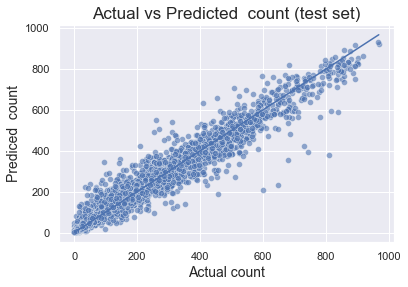

In [12]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

We are pleased with this visualization as our model (line) looks like it's capturing the data pattern well. 

###2.5

In [13]:
#Reporting R squared
np.round(RF_regression.score(X_test, y_test),4)

0.9488

In [14]:
#Reporting MSE
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

41.82

##3 

In [ ]:
my_param_grid = {'n_estimators':[100,200], 'max_features':['log2', 'auto'], 'max_depth':[10,None]} 
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
RF_regression_opt = RandomForestRegressor(random_state=rand_state, max_depth=None,max_features='auto',n_estimators=200)
RF_regression_opt.fit(X_train, y_train)
print(np.round(RF_regression_opt.score(X_test, y_test),4))
print('-----')
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
print(RMSE_test)

It looks like our grid selection for our grid search CV was not better than just the default values. The only selection that the grid search did was to set the number of trees to 200. That performed almost identically, but slightly worse, to the model we trained in the beginning. With the max depth parameter set to None, our model is potentially making some very bushy trees.

##4

In [ ]:
R2 = cross_val_score(estimator = RandomForestRegressor(max_depth=None, max_features='auto', n_estimators=200), X = X_train, y = y_train, cv = 5 , scoring="r2" )

In [ ]:
R2_CV = round(np.mean(R2),4)
R2_CV

In [ ]:
RF_oob = RandomForestRegressor(max_depth=None, max_features='auto', n_estimators=200, oob_score=True)
RF_oob.fit(X_train, y_train)

In [ ]:
RF_oob.oob_score_

It looks like our CV and OOB results are pretty close to the results we got from using the test set. Overall the model is doing pretty well at predicting the number of people riding bikes in NYC.

##5

In [ ]:
features = list(X_train.columns)
importance = RF_regression_opt.feature_importances_
FIM = pd.DataFrame({'Features': features, 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

In [ ]:
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_wc)
statsmodels_reg= model.fit()
statsmodels_reg.summary()

Our 5 most *important* features are: hr, temp, notbizday, yr, hum and yr. Our 5 most *significant* features are hr, temp, hum, yr, and season. 

It looks like notbizday is not very significant at all, but it's 4th on our list of feature importance. This probably means that notbizday has a non-linear relationship with the number of people riding bikes that is being picked up in random forest, but it is being misspecified in the linear model.

# Part 6: XGBoost

In [15]:
conda install -c anaconda py-xgboost

Solving environment: done

## Package Plan ##

  environment location: /Users/nathan/opt/anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  anaconda
    ca-certificates-2022.3.29  |       hecd8cb5_1         125 KB  anaconda
    certifi-2021.10.8          |   py39hecd8cb5_2         156 KB  anaconda
    libxgboost-1.5.0           |       he9d5cce_1         2.2 MB  anaconda
    openssl-1.1.1n             |       hca72f7f_0         3.5 MB  anaconda
    py-xgboost-1.5.0           |   py39hecd8cb5_1         164 KB  anaconda
    ------------------------------------------------------------
                                           Total:         6.2 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  anaconda/osx-64::_py-xgboost-mutex-2.0-cpu_0 None
  libxgboost 

In [22]:
import xgboost 
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [24]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, AdaBoostRegressor, GradientBoostingRegressor

In [40]:
#Vanilla RF
RF_reg = RandomForestRegressor(random_state=rand_state,  n_estimators=100)

In [41]:
%%time
RF_reg.fit(X_train, y_train)

CPU times: user 2.87 s, sys: 123 ms, total: 2.99 s
Wall time: 3.07 s


RandomForestRegressor(random_state=1000)

In [37]:
# AdaBoost
AdB_reg = AdaBoostRegressor(random_state=rand_state)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 21 µs


In [43]:
%%time
AdB_reg.fit(X_train, y_train)

CPU times: user 521 ms, sys: 19 ms, total: 540 ms
Wall time: 553 ms


AdaBoostRegressor(random_state=1000)

In [32]:
# Gradient Boosting (GBM)
GBM_reg = GradientBoostingRegressor(random_state=rand_state)

In [33]:
%%time
GBM_reg.fit(X_train, y_train)

CPU times: user 793 ms, sys: 24.1 ms, total: 817 ms
Wall time: 840 ms


GradientBoostingRegressor(random_state=1000)

In [34]:
# XGBoost
XGB_reg = XGBRegressor(random_state=rand_state,  n_estimators=100)

In [35]:
%%time
XGB_reg.fit(X_train, y_train)

CPU times: user 3.34 s, sys: 184 ms, total: 3.53 s
Wall time: 583 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=1000,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
# Predicting the Test set probabilities and classes
y_hat_RF       = RF_reg.predict(X_test)
y_hat_AdB      = AdB_reg.predict(X_test)
y_hat_GBM      = GBM_reg.predict(X_test)
y_hat_XGB      = XGB_reg.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, r2_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [49]:
print('RF  Accuracy = {}'.format(r2_score(y_test, y_hat_RF)))
print('AdB Accuracy = {}'.format(r2_score(y_test, y_hat_AdB)))
print('GBM Accuracy = {}'.format(r2_score(y_test, y_hat_GBM)))
print('XGB Accuracy = {}'.format(r2_score(y_test, y_hat_XGB)))

RF  Accuracy = 0.9487843353334885
AdB Accuracy = 0.6656093777776118
GBM Accuracy = 0.8563406501875857
XGB Accuracy = 0.9516166912706526


Execution Speed Rank (1 = fastest):
1. AdaBoost: 553 ms
2. XGBoost: 583 ms
3. Gradient Boost: 840 ms
4. Random Forest: 3.07s 

Performance Rank:
1. XGBoost: 95.2%
2. Random Forest: 94.9%
3. Gradient Boosting: 85.6%
4. AdaBoost: 66.6%

In [74]:
print("overall winner: XGBoost")

overall winner: XGBoost


#Q2: Classification


##1

In [50]:
df['overload'] = np.where(df['count']>500,1,0)

In [51]:
df.drop('count', axis=1, inplace = True)

In [52]:
pd.crosstab(df['overload'],df['overload'], normalize='all')*100

overload,0,1
overload,,
0,92.640543,0.000000
1,0.000000,7.359457


Our data is highly imbalanced, with 7% of observations falling under the target variable

##2.

In [53]:
y = df['overload']
X = df.drop('overload', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

##3.1

In [54]:
RF_classifier = RandomForestClassifier(random_state=rand_state)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1000)

###3.2

In [55]:
#  Test set classes 
y_hat      = RF_classifier.predict(X_test)
# test set probabilities
y_hat_probs = RF_classifier.predict_proba(X_test)[:,1] 


###3.3 INTERPRET

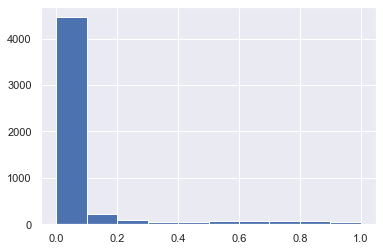

In [56]:
plt.hist(y_hat_probs)
plt.show()

our model always predicts positive above a 0.1 threshold

###3.4

In [57]:
print(confusion_matrix(y_test, y_hat))

[[4784   35]
 [ 113  282]]


In [58]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4819
           1       0.89      0.71      0.79       395

    accuracy                           0.97      5214
   macro avg       0.93      0.85      0.89      5214
weighted avg       0.97      0.97      0.97      5214



Our model is accruately classifying our target variable as pos/neg 97 oof the time.Because our data is imbalanced, accuracy is not as reliable.  

The precision of the model is 0.89, indicating that we are doing ok limiting false positives.Our recall is slightly lower at 0.71, so we're letting the mdel identify false negatives more often. This exposes us to the risk of under-upplying bikes, because we will predict no overload when there actually is one. 
. 

##4

In [ ]:
my_param_grid = {'n_estimators':[100,200], 'criterion':['gini','entropy'],  'max_features':['log2', 'auto'], 'max_depth':[10,None]}

In [ ]:
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )


In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
y_hat_optimized = grid.predict(X_test)


In [ ]:
print(confusion_matrix(y_test, y_hat_optimized))

In [ ]:
print(classification_report(y_test, y_hat_optimized))

Our model's accuracy and precision stayed close to the same after hyperparameter tuning. We were able to increase recall/ limit false negatives, though. 

##5.

In [ ]:
R2 = cross_val_score(estimator = RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=500), X = X_train, y = y_train, cv = 5 , scoring="r2" )

In [ ]:
#5-fold cross-validated R^2
R2_CV = round(np.mean(R2),4)
R2_CV


In [ ]:
#Out-of-bag accuracy
RF_oob = RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=500, oob_score=True)
RF_oob.fit(X_train, y_train)

In [ ]:
RF_oob.oob_score_

Our out-of-bag accuracy is quite high at over 97%. Cross-validated accuracy is lower than what we had previously estimated at 60.11%.

##6.Imbalanced Data

In [ ]:
RF_balanced = RandomForestClassifier(random_state=1000, criterion='entropy', max_features='log2', max_depth=10, class_weight='balanced_subsample')

In [ ]:
y_hat_balanced = RF_balanced.fit(X_train, y_train).predict(X_test)

In [ ]:
print(classification_report(y_test, y_hat_balanced))

Using a balanced random forest classifier, our accuracy decreased slightly but we were able to increase recall and further limit false negatives. This makes sense because our unbalanced data could have hgher acuracy just by predicting negatives because it is so much more of the data, so now we need to give them more attention 

##7.

In [ ]:
# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = RF_balanced.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill     : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest (balanced)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Our AUC is 97.9%, and we can trust it because we are using a balanced version of the RF model. 

##8

In [ ]:
features = list(X_train.columns)
features

In [ ]:
importance = RF_balanced.feature_importances_
importance

In [ ]:
fi = pd.DataFrame({'Features': features , 'Feature_importance':importance})
fi = fi.sort_values(by=['Feature_importance'])
fi

Our most important features are holiday, weathersit (), windspeed (), weekday (), and season. This follows, because traffic and tourism is probably a lot higher in the city during holidays. Weather also makes a lot of sense to predict whether people are outside riding bikes, and weathersit r windspeed categorize weather more specifically and accurately than temperature or humidity. This also follows to why season is important, with similar weather patterns throughouot a season. 

# Part 6: Boosting


In [59]:
# Vanilla Random Forest
RF_classifier = RandomForestClassifier(random_state=rand_state,  n_estimators=100)

In [60]:
%%time
RF_classifier.fit(X_train, y_train)

CPU times: user 649 ms, sys: 28.8 ms, total: 678 ms
Wall time: 694 ms


RandomForestClassifier(random_state=1000)

In [61]:
#AdaBoost
AdB_classifier = AdaBoostClassifier(random_state=rand_state,  n_estimators=100)

In [62]:
%%time
AdB_classifier.fit(X_train, y_train)

CPU times: user 596 ms, sys: 22.3 ms, total: 618 ms
Wall time: 628 ms


AdaBoostClassifier(n_estimators=100, random_state=1000)

In [64]:
# GRadient Boosting 
GBM_classifier = GradientBoostingClassifier(random_state=rand_state,  n_estimators=100)

In [65]:
%%time
GBM_classifier.fit(X_train, y_train)

CPU times: user 870 ms, sys: 29.4 ms, total: 899 ms
Wall time: 932 ms


GradientBoostingClassifier(random_state=1000)

In [66]:
#XGBoost
XGB_classifier = XGBClassifier(random_state=rand_state,  n_estimators=100)

In [72]:
%%time
XGB_classifier.fit(X_train, y_train)

[22:26:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 3.16 s, sys: 213 ms, total: 3.37 s
Wall time: 587 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1000,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
# Predicting 
y_hat_RF       = RF_classifier.predict(X_test)
y_hat_AdB      = AdB_classifier.predict(X_test)
y_hat_GBM      = GBM_classifier.predict(X_test)
y_hat_XGB      = XGB_classifier.predict(X_test)

In [71]:
# print f1 scores
print('RF  Accuracy = {}'.format(f1_score(y_test, y_hat_RF)))
print('AdB Accuracy = {}'.format(f1_score(y_test, y_hat_AdB)))
print('GBM Accuracy = {}'.format(f1_score(y_test, y_hat_GBM)))
print('XGB Accuracy = {}'.format(f1_score(y_test, y_hat_XGB)))

RF  Accuracy = 0.7921348314606741
AdB Accuracy = 0.5780525502318393
GBM Accuracy = 0.7780979827089336
XGB Accuracy = 0.864935064935065


Runtime:
1. XGBoost: 587 ms
2. Ada Boost: 628 ms
3. Random Forest: 694 ms
4. Gradient Boosting: 932 ms
Performance (F1): 
1. XGBoost: 0.86
2. Random Forest: 0.79
3. Gradient Boost: 0.78
4. AdaBoost: 0.58

In [73]:
print("overall winner: XGBoost")

overall winner: XGBoost
